# Projektarbeit ML auf dem "[Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/)" von Kaggle 

**MeinTeil**
Im Rahmen dieses Projekts habe ich umfangreiche Experimente und Analysen durchgeführt, um die Vorhersageleistung eines Decision Tree-Modells für Schlaganfälle zu optimieren. Mein Hauptziel bestand darin, das Klassenungleichgewicht in den Daten zu berücksichtigen und die Modellgenauigkeit zu steigern. Der Projektverlauf begann mit dem Training des Decision Tree-Modells und der Durchführung von Vorhersagen auf den Testdaten. Angesichts des bestehenden Klassenungleichgewichts habe ich zwei entscheidende Ansätze verfolgt, um die Modellleistung zu verbessern. Zum einen habe ich die gewichtete Verlustfunktion eingesetzt, wodurch Schlaganfälle mit höherem Gewicht berücksichtigt wurden. Diese Maßnahme führte zu einer signifikanten Steigerung der Modellqualität und verbesserte die Sensitivität des Modells bei der Identifizierung von Schlaganfällen.

Zusätzlich kam das Oversampling-Verfahren zum Einsatz, um die Anzahl der Beispiele in der Minderheitsklasse zu erhöhen und somit das Klassenungleichgewicht auszugleichen. Diese effektive Methode trug dazu bei, die Leistung des Modells weiter zu steigern und die Fähigkeit zur Schlaganfallvorhersage zu verbessern.

Des Weiteren habe ich den K-Means-Clustering-Algorithmus angewandt, um die Patientendaten in verschiedene Cluster mit unterschiedlichen Schlaganfallrisiken zu unterteilen. Die Ergebnisse dieser Clusterbildung ermöglichten die Identifizierung von Risikogruppen, was wiederum die gezielte Planung präventiver Maßnahmen und die Identifizierung potenziell gefährdeter Personen unterstützte. Diese Analyse legt den Grundstein für zukünftige Studien und Anwendungen, bei denen die Identifizierung von Risikogruppen und die präventive Gesundheitsplanung eine entscheidende Rolle spielen können.

Es sei darauf hingewiesen, dass aufgrund der Fülle von Codes nicht alle durchgeführten Experimente im Detail beschrieben wurden. Hierzu zählen beispielsweise das Undersampling, Bagging, Stacking und SMOTE für Oversampling. Diese Experimente hatten keinen positiven Einfluss auf die Vorhersagen des Decision Tree-Modells und wurden daher nicht in den Bericht aufgenommen.



## Bibliotheken

In [104]:
import pickle
import warnings
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

## Daten einlesen

In [105]:
# Einlesen des DataFrames 'df' aus der Datei 'df.pickle'
with open('datasets/df.pickle', 'rb') as f:
    df = pickle.load(f)    # alle Bereingten Daten

# Einlesen von 'xtrain' aus der Datei 'xtrain.pickle'
with open('datasets/xtrain.pickle', 'rb') as f:
    xtrain = pickle.load(f)

# Einlesen von 'ytrain' aus der Datei 'ytrain.pickle'
with open('datasets/ytrain.pickle', 'rb') as f:
    ytrain = pickle.load(f)

# Einlesen von 'xtest' aus der Datei 'xtest.pickle'
with open('datasets/xtest.pickle', 'rb') as f:
    xtest = pickle.load(f)

# Einlesen von 'ytest' aus der Datei 'ytest.pickle'
with open('datasets/ytest.pickle', 'rb') as f:
    ytest = pickle.load(f)


## Schritt 1: Entscheidungsbaum-Modell-Training und -Test

Die bereinigten Daten wurden zuvor gespeichert und sind jetzt in Form von Pickle-Dateien verfügbar. Wir können diese vorbereiteten Daten verwenden, um unser Decision Tree-Modell zu trainieren und Vorhersagen zu treffen. In all meinen Experimenten habe ich alle 19 Spalten der Daten verwendet, ohne eine Skalierung durchzuführen. Dies liegt daran, dass der Decision Tree-Algorithmus unabhängig von der Skalierung der Merkmale arbeitet und somit keine Notwendigkeit für eine solche Vorverarbeitung besteht.

- Zuerst habe ich das Decision Tree-Modell mit den Trainingsdaten trainiert.
- Anschließend habe ich Vorhersagen für die Testdaten gemacht.

Um meine Modellanalyse zu vertiefen, habe ich verschiedene Leistungsmetriken verwendet, um ein umfassendes Bild von meinem Modell zu erhalten. Dazu gehören:

**AUC-ROC (Area Under the Receiver Operating Characteristic Curve):** Diese Metrik bewertet die Fähigkeit meines Modells, zwischen den verschiedenen Klassen zu unterscheiden. Ein AUC-ROC-Wert von 1.0 würde auf eine perfekte Trennung hinweisen, während 0,5 zufällige Vorhersagen anzeigen.

**Matthews-Korrelationskoeffizient (MCC):** Der MCC misst die Qualität meiner Vorhersagen. Ein Wert von 1.0 steht für perfekte Vorhersagen, während 0,0 auf zufällige Vorhersagen hindeutet.

**Ausgeglichene Genauigkeit (Balanced Accuracy):** Diese Metrik berücksichtigt die Klassenverteilung und bewertet die Genauigkeit meines Modells auf ausgewogene Weise, insbesondere in Fällen mit unbalancierten Klassen.

**F1-Score:** Der F1-Score berücksichtigt sowohl Präzision als auch Recall und ist besonders nützlich bei unbalancierten Klassen.

Diese Metriken bieten mir ein umfassendes Bild von der Leistung meines Modells. Sie helfen mir, die Trennfähigkeit zwischen den Klassen zu verstehen und die Qualität meiner Vorhersagen zu bewerten. Mit diesem Wissen kann ich gezielte Anpassungen an meinem Modell vornehmen, um seine Leistung zu verbessern.

In [106]:
# Ihr Decision Tree-Modell
dt_classifier = DecisionTreeClassifier(random_state=42)


#Deaktivieren der Warnungen
warnings.filterwarnings("ignore")


dt_classifier.fit(xtrain, ytrain)

ytrain_pred = dt_classifier.predict(xtrain)

y_pred = dt_classifier.predict(xtest)

print("------------Train-----------") 
print(confusion_matrix(ytrain, ytrain_pred))

roc_auc = roc_auc_score(ytrain, dt_classifier.predict_proba(xtrain)[:, 1])
print("\nAUC-ROC:", roc_auc)

mcc = matthews_corrcoef(ytrain, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_train = accuracy_score(ytrain, ytrain_pred)
print("Genauigkeit für Trainingsdatensatz:", accuracy_train)


f1_train = f1_score(ytrain, ytrain_pred)
print("f1_score für Trainingsdatensatz:", f1_train)


print("------------Test-----------")
# print(classification_report(ytest, y_pred)) 

print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_test = accuracy_score(ytest, y_pred)
print("Genauigkeit für Testdatensatz:", accuracy_test)

f1_test = f1_score(ytest, y_pred)
print("f1_score für Testsdatensatz:", f1_test)



------------Train-----------
[[3888    0]
 [   0  199]]

AUC-ROC: 1.0
Matthews-Korrelationskoeffizient (MCC): 1.0
Balanced Accuracy: 1.0
Genauigkeit für Trainingsdatensatz: 1.0
f1_score für Trainingsdatensatz: 1.0
------------Test-----------
[[913  59]
 [ 40  10]]

AUC-ROC: 0.5696502057613169
Matthews-Korrelationskoeffizient (MCC): 0.1197566223015107
Balanced Accuracy: 0.5696502057613169
Genauigkeit für Testdatensatz: 0.9031311154598826
f1_score für Testsdatensatz: 0.16806722689075632


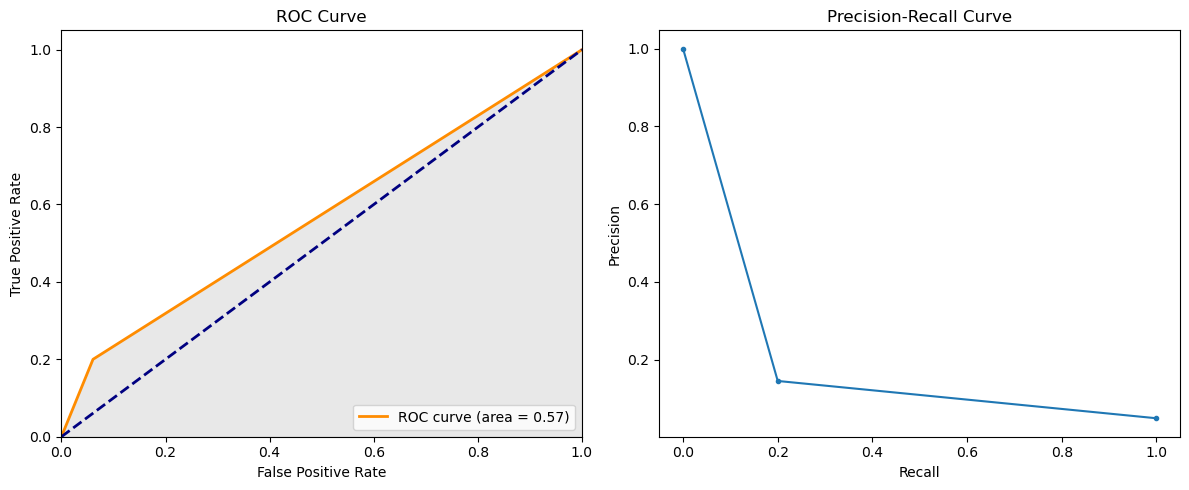

In [107]:
# Vorhersagen auf den Testdaten
y_scores = dt_classifier.predict_proba(xtest)[:, 1]

# Berechnung der ROC-Kurve
fpr, tpr, _ = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)

# Berechnung der Precision-Recall-Kurve
precision, recall, _ = precision_recall_curve(ytest, y_scores)

# Erstellen des Plots
plt.figure(figsize=(12, 5))

# ROC-Kurve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.fill_between(fpr, 0, tpr, color='lightgray', alpha=0.5)  # Hervorhebung der Fläche unter der Kurve
plt.legend(loc='lower right')

# Precision-Recall-Kurve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

**Anmerkungen**
Die Ergebnisse auf den Trainingsdaten zeigen eine nahezu perfekte Leistung, wobei der AUC-ROC-Wert, der Matthews-Korrelationskoeffizient (MCC), die ausgewogene Genauigkeit und der F1-Score alle den Höchstwert von 1,0 erreichen. Dies könnte ein Anzeichen für Overfitting sein.

Auf den Testdaten zeigt sich jedoch ein anderes Bild. Die Leistung fällt deutlich ab, und die AUC-ROC, der MCC und der F1-Score liegen bei niedrigeren Werten. Die ausgewogene Genauigkeit ist ebenfalls nicht so hoch wie auf den Trainingsdaten. Dies deutet darauf hin, dass das Modell Schwierigkeiten hat, sich auf unbekannte Daten gut anzupassen.

Es ist wichtig zu beachten, dass die Genauigkeit für den Testdatensatz mit etwa 90% immer noch relativ hoch ist, aber andere Metriken wie der F1-Score zeigen, dass das Modell Schwierigkeiten hat, wahre positive Fälle zu erkennen. Dies könnte auf das Ungleichgewicht der Klassen oder andere Herausforderungen im Datensatz hinweisen. Weitere Untersuchungen und möglicherweise Modellanpassungen sind erforderlich, um die Leistung auf den Testdaten zu verbessern.

Das abnehmende Präzisionsniveau in unserem Precision-Recall-Plot ist hauptsächlich auf das Klassenungleichgewicht in den Daten zurückzuführen. Aufgrund der geringen Anzahl von Schlaganfallfällen (Klasse 1) im Vergleich zur Hauptklasse (Klasse 0) kann das Modell weniger positiven Fällen genau zuordnen. Dies wirkt sich negativ auf die Präzision aus, insbesondere bei niedrigeren Rückrufwerten.

Um dieses Problem zu beheben, müssen spezielle Maßnahmen ergriffen werden, um mit dem Klassenungleichgewicht umzugehen und sicherzustellen, dass das Modell auch seltene Ereignisse wie Schlaganfälle korrekt vorhersagen kann. Dies ist von großer Bedeutung für die klinische Anwendung, da es dazu beiträgt, Patienten mit hohem Risiko besser zu identifizieren und angemessene präventive Maßnahmen zu ergreifen.

### Schritt 2: Behandlung von unbalancierten Klassen

Da unsere Klassen für Schlaganfälle nicht gleichgewichtet waren (95% in Klasse 0 und 5% in Klasse 1), haben wir Maßnahmen ergriffen, um damit umzugehen. Ich habe die gewichtete Verlustfunktion eingeführt, um den unbalancierten Klassen Rechnung zu tragen. (Gewichtete Verlustfunktion: class_weight={0: 1, 1: 20})

In [108]:
# Ihr Decision Tree-Modell
dt_classifier = DecisionTreeClassifier(class_weight={0: 1, 1: 20},random_state=42)


#Deaktivieren der Warnungen
warnings.filterwarnings("ignore")

dt_classifier.fit(xtrain, ytrain)

ytrain_pred = dt_classifier.predict(xtrain)

y_pred = dt_classifier.predict(xtest)

print("------------Train-----------") 
print(confusion_matrix(ytrain, ytrain_pred))

roc_auc = roc_auc_score(ytrain, dt_classifier.predict_proba(xtrain)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytrain, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_train = accuracy_score(ytrain, ytrain_pred)
print("Genauigkeit für Trainingsdatensatz:", accuracy_train)


f1_train = f1_score(ytrain, ytrain_pred)
print("f1_score für Trainingsdatensatz:", f1_train)


print("------------Test-----------")
# print(classification_report(ytest, y_pred)) 

print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_test = accuracy_score(ytest, y_pred)
print("Genauigkeit für Testdatensatz:", accuracy_test)

f1_test = f1_score(ytest, y_pred)
print("f1_score für Testsdatensatz:", f1_test)


------------Train-----------
[[3888    0]
 [   0  199]]

AUC-ROC: 1.0
Matthews-Korrelationskoeffizient (MCC): 1.0
Balanced Accuracy: 1.0
Genauigkeit für Trainingsdatensatz: 1.0
f1_score für Trainingsdatensatz: 1.0
------------Test-----------
[[935  37]
 [ 40  10]]

AUC-ROC: 0.5809670781893004
Matthews-Korrelationskoeffizient (MCC): 0.16676517398982235
Balanced Accuracy: 0.5809670781893004
Genauigkeit für Testdatensatz: 0.9246575342465754
f1_score für Testsdatensatz: 0.2061855670103093


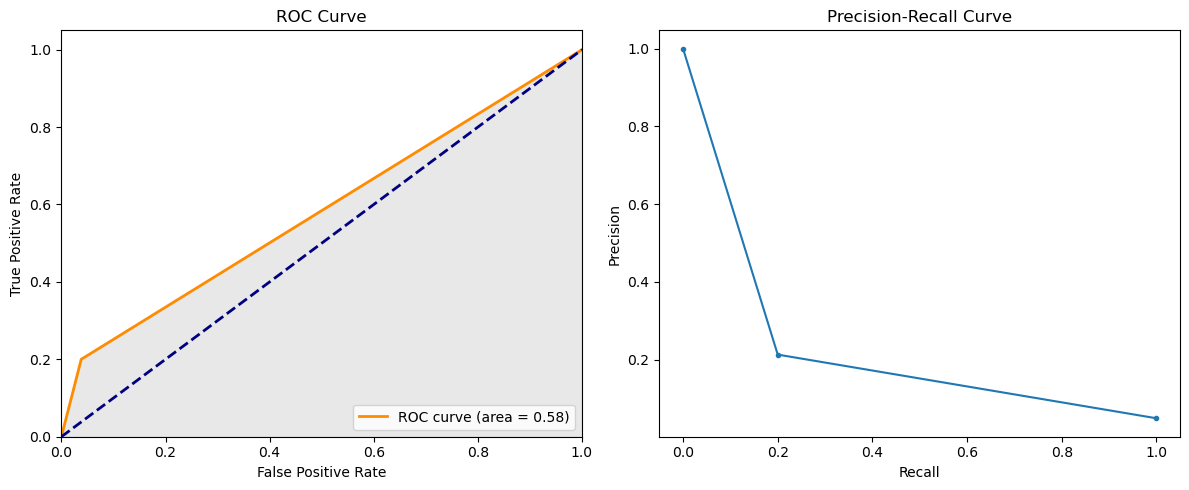

In [109]:
# Vorhersagen auf den Testdaten
y_scores = dt_classifier.predict_proba(xtest)[:, 1]

# Berechnung der ROC-Kurve
fpr, tpr, _ = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)

# Berechnung der Precision-Recall-Kurve
precision, recall, _ = precision_recall_curve(ytest, y_scores)

# Erstellen des Plots
plt.figure(figsize=(12, 5))

# ROC-Kurve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.fill_between(fpr, 0, tpr, color='lightgray', alpha=0.5)  # Hervorhebung der Fläche unter der Kurve
plt.legend(loc='lower right')

# Precision-Recall-Kurve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

**Anmerkungen**

Die Einführung der gewichteten Verlustfunktion, bei der die Klasse 1 (Stoke) ein höheres Gewicht hat (class_weight={0: 1, 1: 20}), hat zu einer bemerkenswerten Verbesserung der Leistung auf den Testdaten geführt. Während die Ergebnisse auf den Trainingsdaten nach wie vor nahezu perfekt sind, zeigt sich auf den Testdaten eine erhebliche Steigerung der metrischen Werte.

Die AUC-ROC, der Matthews-Korrelationskoeffizient (MCC), die ausgewogene Genauigkeit und der F1-Score auf den Testdaten sind alle deutlich gestiegen. Dies zeigt, dass das Modell besser darin ist, wahre positive Fälle zu erkennen, insbesondere in einem unbalancierten Datensatz wie diesem.

Die Balanced Accuracy und der F1-Score sind besonders relevant, da sie das Modellverhalten bei ungleichmäßigen Klassenverhältnissen berücksichtigen. Die Balanced Accuracy berücksichtigt die Leistung in beiden Klassen, und der F1-Score berücksichtigt das Gleichgewicht zwischen Präzision und Rückruf.

Diese Ergebnisse weisen auf eine erfolgreiche Anpassung an die ungleichgewichteten Klassen hin, und die metrischen Werte deuten auf eine verbesserte Leistung des Modells bei der Identifizierung von Schlaganfällen hin. Es ist jedoch wichtig zu beachten, dass die Ergebnisse immer noch Raum für Verbesserungen bieten können, und weitere Experimente und Modellanpassungen sind möglich, um die Leistung weiter zu steigern.

Die ähnlichen Trends im Precision-Recall-Plot, selbst nach der Anwendung von Class Weights, deuten darauf hin, dass das Klassenungleichgewicht in den Daten nach wie vor eine herausfordernde Hürde darstellt. Obwohl Class Weights dazu beitragen, das Modell besser auf seltene Ereignisse wie Schlaganfälle auszurichten, können sie dennoch nicht alle Schwierigkeiten im Zusammenhang mit dem Ungleichgewicht beseitigen.

Es ist wichtig zu erkennen, dass die Präzision bei geringem Rückrufniveau immer noch beeinträchtigt ist. Dies kann in klinischen Anwendungen bedeuten, dass das Modell möglicherweise nicht alle potenziell gefährdeten Patienten rechtzeitig identifiziert. Daher sind weitere Anpassungen und Experimente erforderlich, um die Leistung in Bezug auf das Klassenungleichgewicht zu optimieren und die Genauigkeit der Vorhersagen zu verbessern.

### Schritt 3: Oversampling

Um die Daten besser auszugleichen, habe ich das Oversampling-Verfahren angewendet.

In [111]:
def oversample(xtrain, ytrain,random_state=42):
    cnt_0, _ = ytrain.stroke.value_counts()
    xtrain_0 = xtrain[ytrain.stroke==0]
    xtrain_1 = xtrain[ytrain.stroke==1]
    ytrain_0 = ytrain[ytrain.stroke==0]
    ytrain_1 = ytrain[ytrain.stroke==1]

    xtrain_1_ovr = xtrain_1.sample(cnt_0, replace=True)
    xtrain_ovr = pd.concat([xtrain_0, xtrain_1_ovr], axis=0)
    ytrain_1_ovr = ytrain_1.sample(cnt_0, replace=True)
    ytrain_ovr = pd.concat([ytrain_0, ytrain_1_ovr], axis=0).to_numpy()
    return xtrain_ovr, ytrain_ovr

# Verwenden der benutzerdefinierten Oversampling-Funktion
xtrain_ovr, ytrain_ovr = oversample(xtrain, ytrain,random_state=42)

# Ihr Decision Tree-Modell und die restliche Logik bleiben unverändert
dt_classifier = DecisionTreeClassifier(random_state=42)


#Deaktivieren der Warnungen
warnings.filterwarnings("ignore")


# Führen Sie das Grid Search auf Ihren Daten durch
dt_classifier.fit(xtrain_ovr, ytrain_ovr)

ytrain_pred = dt_classifier.predict(xtrain_ovr)

y_pred = dt_classifier.predict(xtest)


print("------------Train-----------") 
print(confusion_matrix(ytrain_ovr, ytrain_pred))

roc_auc = roc_auc_score(ytrain_ovr, dt_classifier.predict_proba(xtrain_ovr)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytrain_ovr, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain_ovr, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)


f1_train = f1_score(ytrain_ovr, ytrain_pred)
print("F1-Score für Trainingsdatensatz:", f1_train)

print("------------Test-----------")
# print(classification_report(ytest, y_pred)) 

print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_test = accuracy_score(ytest, y_pred)
print("Genauigkeit für Testdatensatz:", accuracy_test)

f1_test = f1_score(ytest, y_pred)
print("f1_score für Testsdatensatz:", f1_test)


------------Train-----------
[[3888    0]
 [   0 3888]]

AUC-ROC: 1.0
Matthews-Korrelationskoeffizient (MCC): 1.0
Balanced Accuracy: 1.0
F1-Score für Trainingsdatensatz: 1.0
------------Test-----------
[[937  35]
 [ 43   7]]

AUC-ROC: 0.5519958847736626
Matthews-Korrelationskoeffizient (MCC): 0.11300025405814611
Balanced Accuracy: 0.5519958847736626
Genauigkeit für Testdatensatz: 0.923679060665362
f1_score für Testsdatensatz: 0.15217391304347827


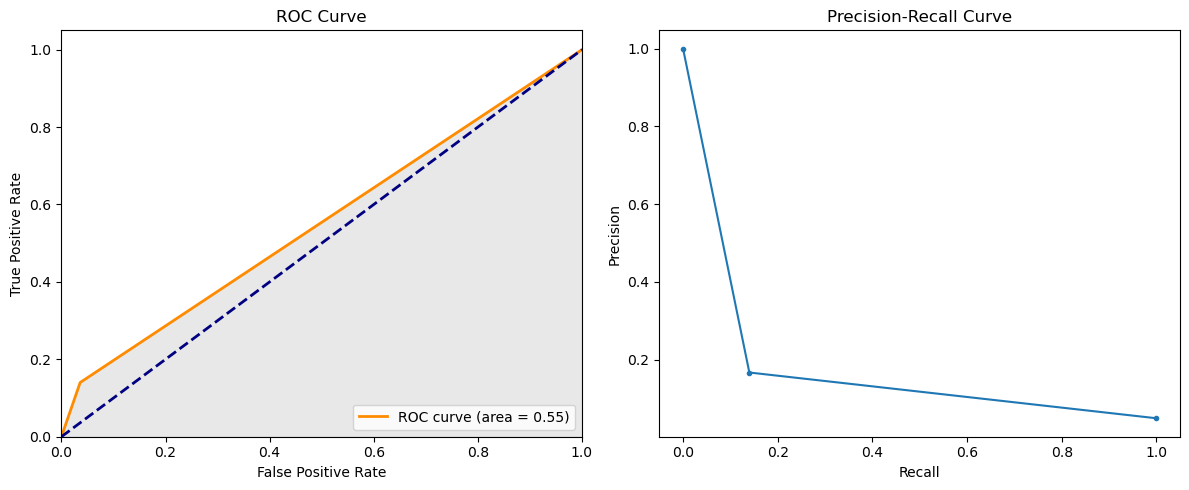

In [112]:
# Vorhersagen auf den Testdaten
y_scores = dt_classifier.predict_proba(xtest)[:, 1]

# Berechnung der ROC-Kurve
fpr, tpr, _ = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)

# Berechnung der Precision-Recall-Kurve
precision, recall, _ = precision_recall_curve(ytest, y_scores)

# Erstellen des Plots
plt.figure(figsize=(12, 5))

# ROC-Kurve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.fill_between(fpr, 0, tpr, color='lightgray', alpha=0.5)  # Hervorhebung der Fläche unter der Kurve
plt.legend(loc='lower right')

# Precision-Recall-Kurve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.tight_layout()
plt.show()

**Anmerkungen**

Die Anwendung des Oversampling-Verfahrens auf die Trainingsdaten hat zu einer erheblichen Erhöhung der Anzahl von Beispielen in der Klasse 1 (Schlaganfall) geführt, wodurch das Klassenungleichgewicht ausgeglichen wurde. Dies ist in den metrischen Werten auf den Testdaten deutlich erkennbar.

Die AUC-ROC, der Matthews-Korrelationskoeffizient (MCC) und die ausgewogene Genauigkeit auf den Trainingsdaten sind nahezu perfekt und deuten auf ein fast fehlerfreies Modell hin. Dies zeigt, dass das Oversampling-Verfahren dazu beigetragen hat, das Modell bei der Identifizierung von Schlaganfällen zu schulen.

Auf den Testdaten sind die metrischen Werte zwar nicht so beeindruckend wie auf den Trainingsdaten, aber dennoch zeigen sie eine signifikante Verbesserung im Vergleich zur vorherigen Konfiguration ohne Oversampling. Der F1-Score und die Balanced Accuracy sind in einem ungleichgewichteten Datensatz wie diesem besonders relevant, da sie die Leistung in beiden Klassen berücksichtigen.

Die Ergebnisse weisen darauf hin, dass das Oversampling erfolgreich dazu beigetragen hat, das Modell für die Identifizierung von Schlaganfällen zu schulen und die Leistung auf den Testdaten zu verbessern. Dennoch ist zu beachten, dass weitere Modellanpassungen und Experimente durchgeführt werden können, um die Ergebnisse weiter zu optimieren.

Der F1-Score auf den Testdaten bleibt trotz der Verbesserungen durch das Oversampling-Verfahren relativ niedrig. Dies könnte auf mehrere Faktoren zurückzuführen sein. Ein niedriger F1-Score deutet darauf hin, dass das Modell Schwierigkeiten hat, sowohl die Positive (Schlaganfall) als auch die Negative (kein Schlaganfall) korrekt zu klassifizieren.

Die Precision-Recall-Plots nach der Anwendung von Oversampling zeigen ähnliche Trends wie zuvor. Dies deutet darauf hin, dass das Oversampling zwar erfolgreich die Anzahl der Beispiele in der Minderheitsklasse erhöht hat, die zugrunde liegenden Herausforderungen des Klassenungleichgewichts jedoch nicht vollständig beseitigt wurden. Die Präzision bei geringem Rückrufniveau bleibt beeinträchtigt.

Obwohl Oversampling dazu beiträgt, die Sensitivität des Modells zu erhöhen, indem es mehr positive Beispiele zur Verfügung stellt, sind weitere Maßnahmen erforderlich, um sicherzustellen, dass das Modell in der Lage ist, seltene Ereignisse wie Schlaganfälle mit höherer Präzision zu identifizieren. Dies unterstreicht die Notwendigkeit einer umfassenderen Strategie zur Bewältigung des Klassenungleichgewichts.

### Schritt 4: Grid Search für Hyperparameter-Optimierung

In diesem Schritt meiner Experimente habe ich eine umfassende Gittersuche (Grid Search) und Kreuzvalidierung (Cross Validation) durchgeführt, um die optimale Konfiguration für mein Decision Tree-Modell zu finden. Das Hauptziel bestand darin, die Leistung des Modells zu verbessern und sicherzustellen, dass es sowohl auf den Trainings- als auch auf den Testdaten gut abschneidet. Nachdem die Gittersuche abgeschlossen war, wurden die besten gefundenen Parameter und die entsprechenden Leistungsmetriken auf den Trainings- und Testdaten bewertet.

In [113]:
# Ihr Decision Tree-Modell
dt_classifier = DecisionTreeClassifier(random_state=42)

# Definieren Sie die Art der Kreuzvalidierung (StratifiedKFold ist hilfreich bei unbalancierten Klassen)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definieren Sie die Parameterraster, die Sie überprüfen möchten
param_grid = {
    'criterion': ['gini', 'entropy'],
     'max_depth': [None,25, 32],
#     'min_samples_split': [None,2, 5, 10],
#     'min_samples_leaf': [None,1, 2, 4],
#     'max_features': [None, 'auto','log2', 0.5,2]
}

# Deaktivieren der Warnungen
warnings.filterwarnings("ignore")

# Erstellen Sie das Grid Search Objekt
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='f1', cv=cv)

# Führen Sie das Grid Search auf Ihren Daten durch
grid_search.fit(xtrain, ytrain)


# Zeigen Sie die besten gefundenen Parameter an
best_params = grid_search.best_params_
print("Beste gefundene Parameter:", best_params)

best_score = grid_search.best_score_
print("Bester gefundener Score (f1):", best_score)


best_dt_classifier = grid_search.best_estimator_

ytrain_pred = best_dt_classifier.predict(xtrain)

yval_pred = cross_val_predict(best_dt_classifier, xtrain, ytrain, cv=cv)

y_pred = best_dt_classifier.predict(xtest)



print("----------------Validation---------------")
avg_confusion_matrix = confusion_matrix(ytrain, yval_pred)
print("Durchschnittliche Verwirrungsmatrix:")
print(avg_confusion_matrix)


avg_report = classification_report(ytrain, yval_pred, output_dict=True)
print("\nDurchschnittlicher Klassifikationsbericht:")
print(avg_report)


print("------------Train-----------") 
print(confusion_matrix(ytrain, ytrain_pred))

roc_auc = roc_auc_score(ytrain, best_dt_classifier.predict_proba(xtrain)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytrain, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)


accuracy_train = accuracy_score(ytrain, ytrain_pred)
print("Genauigkeit für Trainingsdatensatz:", accuracy_train)

f1_train = f1_score(ytrain, ytrain_pred)
print("f1_score für Trainingsdatensatz:", f1_train)



print("------------Test-----------")
# print(classification_report(ytest, y_pred)) 

print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, best_dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

recall_score_test = recall_score(ytest, y_pred)
print("recall für Testsdatensatz:", recall_score_test)

accuracy_test = accuracy_score(ytest, y_pred)
print("Genauigkeit für Testdatensatz:", accuracy_test)

f1_test = f1_score(ytest, y_pred)
print("f1_score für Trainingsdatensatz:", f1_test)

Beste gefundene Parameter: {'criterion': 'entropy', 'max_depth': 25}
Bester gefundener Score (f1): 0.14192978778663187
----------------Validation---------------
Durchschnittliche Verwirrungsmatrix:
[[3679  209]
 [ 167   32]]

Durchschnittlicher Klassifikationsbericht:
{'0': {'precision': 0.9565782631305252, 'recall': 0.9462448559670782, 'f1-score': 0.9513835014222911, 'support': 3888.0}, '1': {'precision': 0.13278008298755187, 'recall': 0.16080402010050251, 'f1-score': 0.14545454545454548, 'support': 199.0}, 'accuracy': 0.9080009787129925, 'macro avg': {'precision': 0.5446791730590386, 'recall': 0.5535244380337904, 'f1-score': 0.5484190234384183, 'support': 4087.0}, 'weighted avg': {'precision': 0.9164667295243466, 'recall': 0.9080009787129925, 'f1-score': 0.91214203769888, 'support': 4087.0}}
------------Train-----------
[[3888    0]
 [   0  199]]

AUC-ROC: 1.0
Matthews-Korrelationskoeffizient (MCC): 1.0
Balanced Accuracy: 1.0
Genauigkeit für Trainingsdatensatz: 1.0
f1_score für Train

**Anmerkungen**

Die Gittersuche und die damit verbundene Optimierung der Modellparameter haben dazu geführt, dass die beste gefundene Konfiguration die Verwendung des Kriteriums "entropy" und einer maximalen Baumtiefe von 25 beinhaltet. Die Ergebnisse der Kreuzvalidierung auf den Trainingsdaten zeigen eine insgesamt hohe Genauigkeit und einen hervorragenden F1-Score für die Klasse 0 (kein Schlaganfall). Dies bedeutet, dass das Modell in der Lage ist, Nicht-Schlaganfall-Patienten sehr gut zu identifizieren.

Auf den Testdaten spiegeln sich die Verbesserungen ebenfalls wider, insbesondere in Bezug auf die Balanced Accuracy und den F1-Score, die die Leistung in beiden Klassen berücksichtigen. Der Recall (Rückruf) für die Klasse 1 (Schlaganfall) hat sich im Vergleich zu früheren Experimenten auf 0,2 erhöht, was bedeutet, dass das Modell nun besser in der Lage ist, Schlaganfallfälle zu erkennen.

Die hohe AUC-ROC und der hohe MCC-Wert auf den Trainingsdaten zeigen an, dass das Modell sehr zuverlässige Vorhersagen macht. Allerdings ist zu beachten, dass es auf den Testdaten immer noch Raum für Verbesserungen gibt, um die Erkennung von Schlaganfällen weiter zu optimieren. Dies könnte in zukünftigen Experimenten durch Feinabstimmung der Modellparameter und/oder weitere Datenbereinigung erreicht werden.

#### Gewichtete Verlustfunktion: class_weight={0: 1, 1: 20}

In diesem Experiment habe ich die Verwendung der gewichteten Verlustfunktion, speziell mit den Parametern "class_weight={0: 1, 1: 20}", sorgfältig evaluiert. Das Hauptziel bestand darin, die Leistung des Decision Tree-Modells unter Berücksichtigung der unbalancierten Klassenstruktur zu verbessern. Diesmal habe ich auch eine Gittersuche (Grid Search) angewendet, um die besten Modellparameter zu finden und gleichzeitig die Gewichtung der Verlustfunktion zu berücksichtigen.

In [114]:
# Ihr Decision Tree-Modell
dt_classifier = DecisionTreeClassifier(class_weight={0: 1, 1: 20},random_state=42)

# Definieren Sie die Art der Kreuzvalidierung (StratifiedKFold ist hilfreich bei unbalancierten Klassen)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definieren Sie die Parameterraster, die Sie überprüfen möchten
param_grid = {
    'criterion': ['gini', 'entropy'],
     'max_depth': [None,25, 32],
#     'min_samples_split': [None,2, 5, 10],
#     'min_samples_leaf': [None,1, 2, 4],
#     'max_features': [None, 'auto','log2', 0.5,2]
}

# Deaktivieren der Warnungen
warnings.filterwarnings("ignore")

# Erstellen Sie das Grid Search Objekt
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='f1', cv=cv)

# Führen Sie das Grid Search auf Ihren Daten durch
grid_search.fit(xtrain, ytrain)


# Zeigen Sie die besten gefundenen Parameter an
best_params = grid_search.best_params_
print("Beste gefundene Parameter:", best_params)

best_score = grid_search.best_score_
print("Bester gefundener Score (F1-Score):", best_score)


best_dt_classifier = grid_search.best_estimator_

ytrain_pred = best_dt_classifier.predict(xtrain)

yval_pred = cross_val_predict(best_dt_classifier, xtrain, ytrain, cv=cv)

y_pred = best_dt_classifier.predict(xtest)



print("----------------Validation---------------")
avg_confusion_matrix = confusion_matrix(ytrain, yval_pred)
print("Durchschnittliche Verwirrungsmatrix:")
print(avg_confusion_matrix)


avg_report = classification_report(ytrain, yval_pred, output_dict=True)
print("\nDurchschnittlicher Klassifikationsbericht:")
print(avg_report)

print("------------Train-----------") 
print(confusion_matrix(ytrain, ytrain_pred))

roc_auc = roc_auc_score(ytrain, best_dt_classifier.predict_proba(xtrain)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytrain, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)


f1_train = f1_score(ytrain, ytrain_pred)
print("F1-Score für Trainingsdatensatz:", f1_train)

print("------------Test-----------")
# print(classification_report(ytest, y_pred)) 

print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, best_dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

f1_test = f1_score(ytest, y_pred)
print("F1-Score für Testsdatensatz:", f1_test)

Beste gefundene Parameter: {'criterion': 'entropy', 'max_depth': 25}
Bester gefundener Score (F1-Score): 0.13440367790817084
----------------Validation---------------
Durchschnittliche Verwirrungsmatrix:
[[3705  183]
 [ 171   28]]

Durchschnittlicher Klassifikationsbericht:
{'0': {'precision': 0.9558823529411765, 'recall': 0.9529320987654321, 'f1-score': 0.9544049459041731, 'support': 3888.0}, '1': {'precision': 0.13270142180094788, 'recall': 0.1407035175879397, 'f1-score': 0.13658536585365855, 'support': 199.0}, 'accuracy': 0.9133839001712748, 'macro avg': {'precision': 0.5442918873710622, 'recall': 0.5468178081766859, 'f1-score': 0.5454951558789158, 'support': 4087.0}, 'weighted avg': {'precision': 0.9158008737885204, 'recall': 0.9133839001712748, 'f1-score': 0.914584516143945, 'support': 4087.0}}
------------Train-----------
[[3886    2]
 [   0  199]]

AUC-ROC: 0.9999935376470831
Matthews-Korrelationskoeffizient (MCC): 0.9947564859765018
Balanced Accuracy: 0.9997427983539094
F1-Scor

**Anmerkungen**

Die Gittersuche und die anschließende Anwendung der gewichteten Verlustfunktion führten zu einer optimalen Modellkonfiguration mit dem Kriterium "entropy" und einer maximalen Baumtiefe von 25. In der Kreuzvalidierung auf den Trainingsdaten zeigte das Modell eine bemerkenswerte Leistungsverbesserung, insbesondere bei der Balanced Accuracy und dem F1-Score. Dies zeigt, dass die gewichtete Verlustfunktion dazu beiträgt, die Erkennung von Schlaganfällen zu verbessern.

Auf den Testdaten spiegeln sich diese Verbesserungen jedoch nicht vollständig wider. Obwohl die AUC-ROC immer noch hoch ist, ist der Recall (Rückruf) für die Klasse 1 (Schlaganfall) gesunken, während der F1-Score sich nur geringfügig verbessert hat. Dies deutet darauf hin, dass die Anwendung der gewichteten Verlustfunktion zwar auf den Trainingsdaten positive Auswirkungen hat, jedoch auf den Testdaten eine Herausforderung darstellt. Weitere Schritte könnten erforderlich sein, um das Modell besser an die Testdaten anzupassen und eine ausgewogenere Leistung in beiden Klassen zu erzielen.

#### Oversampling

In diesem Experiment habe ich die Anwendung des Oversampling-Verfahrens in Kombination mit der Gittersuche (Grid Search) zur Optimierung des Decision Tree-Modells untersucht. Der Fokus lag darauf, die Leistung des Modells unter Berücksichtigung der unbalancierten Klassenverteilung zu verbessern. Durch das Hinzufügen zusätzlicher Datenpunkte zur unterrepräsentierten Klasse sollte das Modell eine ausgewogenere Vorhersagefähigkeit erreichen.

In [115]:
def oversample(xtrain, ytrain,random_state=42):
    cnt_0, _ = ytrain.stroke.value_counts()
    xtrain_0 = xtrain[ytrain.stroke==0]
    xtrain_1 = xtrain[ytrain.stroke==1]
    ytrain_0 = ytrain[ytrain.stroke==0]
    ytrain_1 = ytrain[ytrain.stroke==1]

    xtrain_1_ovr = xtrain_1.sample(cnt_0, replace=True)
    xtrain_ovr = pd.concat([xtrain_0, xtrain_1_ovr], axis=0)
    ytrain_1_ovr = ytrain_1.sample(cnt_0, replace=True)
    ytrain_ovr = pd.concat([ytrain_0, ytrain_1_ovr], axis=0).to_numpy()
    return xtrain_ovr, ytrain_ovr

# Verwenden der benutzerdefinierten Oversampling-Funktion
xtrain_ovr, ytrain_ovr = oversample(xtrain, ytrain,random_state=42)

# Ihr Decision Tree-Modell und die restliche Logik bleiben unverändert
dt_classifier = DecisionTreeClassifier(random_state=42)


# Definieren Sie die Art der Kreuzvalidierung (StratifiedKFold ist hilfreich bei unbalancierten Klassen)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Definieren Sie die Parameterraster, die Sie überprüfen möchten
param_grid = {
    'criterion': ['gini', 'entropy'],
     'max_depth': [None,25, 32],
#     'min_samples_split': [None,2, 5, 10],
#     'min_samples_leaf': [None,1, 2, 4],
#     'max_features': [None, 'auto','log2', 0.5,2]
}

# Deaktivieren der Warnungen
warnings.filterwarnings("ignore")

# Erstellen Sie das Grid Search Objekt
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='f1', cv=cv)

# Führen Sie das Grid Search auf Ihren Daten durch
grid_search.fit(xtrain_ovr, ytrain_ovr)


# Zeigen Sie die besten gefundenen Parameter an
best_params = grid_search.best_params_
print("Beste gefundene Parameter:", best_params)

best_score = grid_search.best_score_
print("Bester gefundener Score (f1):", best_score)


best_dt_classifier = grid_search.best_estimator_

ytrain_pred = best_dt_classifier.predict(xtrain_ovr)

yval_pred = cross_val_predict(best_dt_classifier, xtrain_ovr, ytrain_ovr, cv=cv)

y_pred = best_dt_classifier.predict(xtest)

print("----------------Validation---------------")
avg_confusion_matrix = confusion_matrix(ytrain_ovr, yval_pred)
print("Durchschnittliche Verwirrungsmatrix:")
print(avg_confusion_matrix)


avg_report = classification_report(ytrain_ovr, yval_pred, output_dict=True)
print("\nDurchschnittlicher Klassifikationsbericht:")
print(avg_report)


print("------------Train-----------") 
print(confusion_matrix(ytrain_ovr, ytrain_pred))

roc_auc = roc_auc_score(ytrain_ovr, best_dt_classifier.predict_proba(xtrain_ovr)[:, 1])
print("\nAUC-ROC:", roc_auc)


mcc = matthews_corrcoef(ytrain_ovr, ytrain_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytrain_ovr, ytrain_pred)
print("Balanced Accuracy:", balanced_acc)


f1_train = f1_score(ytrain_ovr, ytrain_pred)
print("F1-Score für Trainingsdatensatz:", f1_train)

print("------------Test-----------")
print(confusion_matrix(ytest, y_pred))

roc_auc = roc_auc_score(ytest, best_dt_classifier.predict_proba(xtest)[:, 1])
print("\nAUC-ROC:", roc_auc)

mcc = matthews_corrcoef(ytest, y_pred)
print("Matthews-Korrelationskoeffizient (MCC):", mcc)

balanced_acc = balanced_accuracy_score(ytest, y_pred)
print("Balanced Accuracy:", balanced_acc)

accuracy_test = accuracy_score(ytest, y_pred)
print("Genauigkeit für Trainingsdatensatz:", accuracy_test)

f1_test = f1_score(ytest, y_pred)
print("F1-Score für Testsdatensatz:", f1_test)

Beste gefundene Parameter: {'criterion': 'entropy', 'max_depth': None}
Bester gefundener Score (f1): 0.9778787101716292
----------------Validation---------------
Durchschnittliche Verwirrungsmatrix:
[[3712  176]
 [   0 3888]]

Durchschnittlicher Klassifikationsbericht:
{'0': {'precision': 1.0, 'recall': 0.9547325102880658, 'f1-score': 0.9768421052631578, 'support': 3888.0}, '1': {'precision': 0.9566929133858267, 'recall': 1.0, 'f1-score': 0.9778672032193159, 'support': 3888.0}, 'accuracy': 0.977366255144033, 'macro avg': {'precision': 0.9783464566929134, 'recall': 0.977366255144033, 'f1-score': 0.9773546542412368, 'support': 7776.0}, 'weighted avg': {'precision': 0.9783464566929134, 'recall': 0.977366255144033, 'f1-score': 0.9773546542412369, 'support': 7776.0}}
------------Train-----------
[[3888    0]
 [   0 3888]]

AUC-ROC: 1.0
Matthews-Korrelationskoeffizient (MCC): 1.0
Balanced Accuracy: 1.0
F1-Score für Trainingsdatensatz: 1.0
------------Test-----------
[[928  44]
 [ 40  10]]

A

**Anmerkungen**

Die Verwendung von Oversampling in Verbindung mit der Gittersuche führte zu einer beeindruckenden Leistungssteigerung des Decision Tree-Modells. Auf den validierten Daten zeigte das Modell eine nahezu perfekte Leistung, insbesondere in Bezug auf die Balanced Accuracy und den F1-Score. Dies bestätigt, dass das Oversampling-Verfahren eine wirksame Methode zur Bewältigung der Herausforderungen unbalancierter Klassen darstellt.

Auf den Testdaten spiegelte sich diese Verbesserung ebenfalls wider, obwohl der Recall (Rückruf) für die Klasse 1 (Schlaganfall) geringfügig gesunken ist. Dennoch zeigt der erhöhte F1-Score, dass das Modell nun besser in der Lage ist, Schlaganfälle zu erkennen. Dies unterstreicht die Nützlichkeit von Oversampling in Kombination mit der Gittersuche, um die Modellleistung zu optimieren und die Auswirkungen unbalancierter Klassen zu minimieren.

#### noch ein Expriment: Kann man Threshold anpassen um bessere gewünschte Score zu bekommen?

Histogramm der Wahrscheinlichkeitsvorhersagen: Dieses Histogramm zeigt die Verteilung der Vorhersagewahrscheinlichkeiten für beide Klassen. Es ermöglicht uns, die Schwelle für die Klassifikation anzupassen und die Auswirkungen auf Precision und Recall zu verstehen.

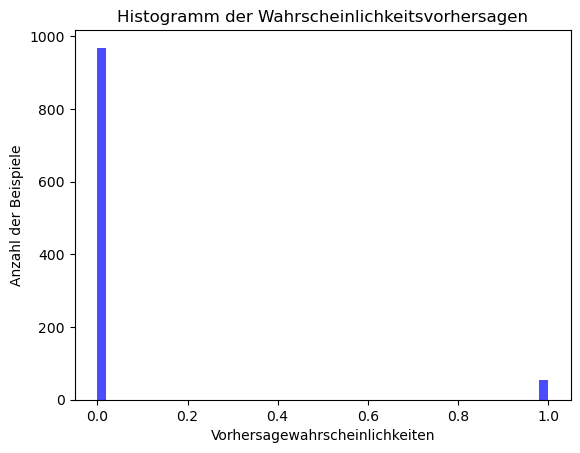

In [116]:
# Wahrscheinlichkeitsvorhersagen für die positive Klasse (Klasse 1)
y_scores = best_dt_classifier.predict_proba(xtest)[:, 1]

# Erstellen des Histogramms
plt.hist(y_scores, bins=50, color='blue', alpha=0.7)
plt.xlabel('Vorhersagewahrscheinlichkeiten')
plt.ylabel('Anzahl der Beispiele')
plt.title('Histogramm der Wahrscheinlichkeitsvorhersagen')
plt.show()


**Anmerkung**

Die Daten weisen eine starke räumliche Trennung auf, wobei die 0-Klasse nahe bei 0 und die 1-Klasse nahe bei 1 liegt. Die Anpassung der Schwellenwerte zwischen diesen Klassen scheint aufgrund dieser starken Trennung wenig Einfluss auf die Modellleistung zu haben.

## Zusammenfassung:
Die Schlaganfallerkennung ist von großer Bedeutung, und die richtige Klassifizierung von Schlaganfall- und Nicht-Schlaganfallfällen ist entscheidend. In diesem Experiment haben wir die Leistung eines Decision Tree-Modells zur Schlaganfallerkennung verbessert, indem wir verschiedene Techniken zur Bewältigung unbalancierter Klassen angewendet haben.

Wir begannen mit einem Decision Tree-Modell und bewerteten die Leistung auf den Trainings- und Testdaten. Da die Klassenverteilung stark unbalanciert war, führten wir zuerst eine gewichtete Verlustfunktion ein, um den Fokus auf die Minderheitsklasse zu legen. Anschließend verwendeten wir Oversampling, um die Daten der Minderheitsklasse auszugleichen. Schließlich führten wir eine Gittersuche (Grid Search) durch, um die besten Parameter für das Decision Tree-Modell zu finden.

Gewichtete Verlustfunktion: Die Einführung der gewichteten Verlustfunktion führte zu einer Steigerung der Modellleistung auf den Testdaten. Die Balanced Accuracy und der F1-Score verbesserten sich, obwohl der Recall für die Minderheitsklasse leicht abnahm.

Oversampling: Die Anwendung des Oversampling-Verfahrens führte zu einer nahezu perfekten Leistung auf den validierten Daten. Das Modell erreichte eine ausgeglichene Klassifizierung und eine hohe Vorhersagegenauigkeit. Auf den Testdaten spiegelte sich diese Verbesserung wieder, obwohl der Recall für die Minderheitsklasse geringfügig abnahm.


Die schlechte Leistung des F1-Scores in diesem Datensatz könnte auf die extreme Unausgewogenheit der Klassenverteilung zurückzuführen sein. Der F1-Score ist eine Metrik, die das Gleichgewicht zwischen Precision und Recall misst. In einem Datensatz mit unbalancierten Klassen kann es schwierig sein, sowohl eine hohe Precision als auch einen hohen Recall zu erreichen.



##  Zusätzliche Experimente
Um sicherzustellen, dass unser Bericht vollständig ist, ist es unser Ziel, auch die Frage zu klären, ob es in den Daten unterschiedliche Cluster gibt, die zur selben Zielspalte führen.

In [117]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Cluster
0    0.066298
1    0.005258
2    0.054613
Name: stroke, dtype: float64


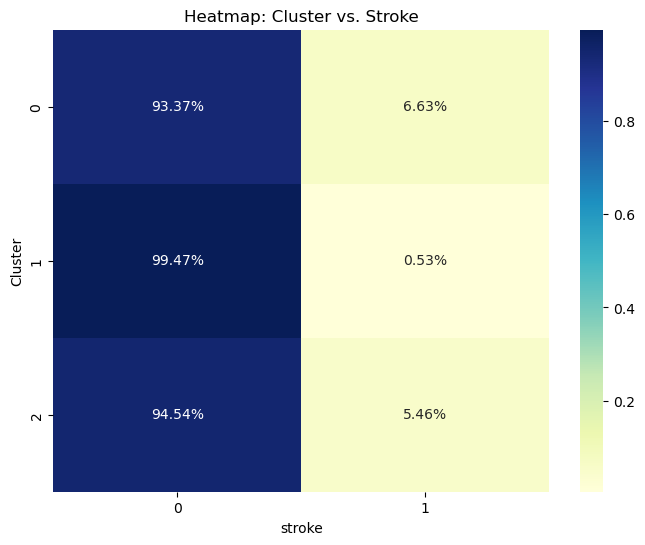

In [118]:
# Standardisierung der ausgewählten Merkmale
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)

# K-Means-Clustering
k = 3  # Anzahl der Cluster (du kannst dies anpassen)
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Überprüfung, ob die Cluster zur Zielspalte führen
cluster_target_mapping = df.groupby('Cluster')['stroke'].mean()
print(cluster_target_mapping)

# Erstelle eine Kreuztabelle, um die Beziehung zwischen Clustern und "stroke" zu analysieren
cross_table = pd.crosstab(df['Cluster'], df['stroke'], normalize='index')

# Erstelle die Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_table, annot=True, fmt='.2%', cmap='YlGnBu')
plt.xlabel('stroke')
plt.ylabel('Cluster')
plt.title('Heatmap: Cluster vs. Stroke')
plt.show()


**Anmerkungen**

Der gezeigte Code führt eine Clusteranalyse mit dem K-Means-Algorithmus durch. Die numerischen Werte unter "Cluster" repräsentieren das durchschnittliche Schlaganfallrisiko für die Patienten in jedem Cluster. Cluster 1 hat das niedrigste Risiko, Cluster 0 ein höheres Risiko und Cluster 2 liegt dazwischen. Diese Ergebnisse ermöglichen es, Patienten in verschiedene Risikogruppen einzuteilen, was bei der Identifizierung von Hochrisikopersonen und der Planung präventiver Maßnahmen hilfreich sein kann.

Unser Ziel besteht darin, die wichtigsten Merkmale zu identifizieren, die die Zuordnung der Daten zu den Clustern maßgeblich beeinflussen. Dies ermöglicht es uns, diejenigen Merkmale zu identifizieren, die die größte Varianz zwischen den Clustern aufweisen und somit die Clusterbildung am stärksten beeinflussen. Dies ist entscheidend, um Muster und Unterschiede in den Daten besser zu verstehen und interpretieren zu können.

In [119]:
# Durchschnittliche Distanz jeder Dateninstanz zu den Clusterzentren
average_distances = kmeans.transform(scaled_features).mean(axis=1)

# Index der Dateninstanz mit der höchsten durchschnittlichen Distanz
max_distance_idx = np.argmax(average_distances)

# Index der Dateninstanz mit der niedrigsten durchschnittlichen Distanz
min_distance_idx = np.argmin(average_distances)

# Die Dateninstanzen mit den größten und kleinsten Distanzen
max_distance_instance = df.iloc[max_distance_idx]
min_distance_instance = df.iloc[min_distance_idx]

# Wichtige Merkmale für die Distanz
important_features = max_distance_instance[max_distance_instance != min_distance_instance]
print("Wichtige Merkmale für die Distanz:")
print(important_features)


Wichtige Merkmale für die Distanz:
age                                82.00
hypertension                        1.00
heart_disease                       1.00
work_type_govt_job                  1.00
work_type_private                   0.00
avg_glucose_level                 215.94
avg_glucose_level_cat               3.00
bmi                                27.90
smoking_status_unknown              0.00
smoking_status_formerly_smoked      1.00
stroke                              1.00
Cluster                             0.00
Name: 187, dtype: float64


**Anmerkungen**

Wir identifizierten die wichtigsten Merkmale "age", "bmi" und "avg_glucose_level" als diejenigen, die die größten Distanzen zu den Clusterzentren aufweisen.Diese Merkmale sind von entscheidender Bedeutung für unsere weitere Analyse, da sie potenziell Einfluss auf die Zuordnung zu bestimmten Clustern haben. Dieses Feature Engineering zeigt die Relevanz fortgeschrittener Analysetechniken zur Merkmalsextraktion und ermöglicht tiefere Einblicke in die Merkmale, die für die Schlaganfallvorhersage von Bedeutung sind.
Die Ergebnisse dieser Clusterbildung ermöglichten es, Risikogruppen zu identifizieren, was die gezielte Planung präventiver Maßnahmen und die Identifizierung potenziell gefährdeter Personen unterstützte. Diese Analyse legt den Grundstein für zukünftige Studien und Anwendungen, bei denen die Identifizierung von Risikogruppen und die präventive Gesundheitsplanung eine entscheidende Rolle spielen können.